https://blog.csdn.net/weixin_42163563/article/details/119715312

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
DATA_PATH = "附件一：325个样本数据.xlsx"

df = pd.read_excel(DATA_PATH)
# show the shape of data
df.shape


# then drop the missing value
df = df.dropna(how = 'any')

df.shape

(325, 367)

In [3]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['辛烷值RON'],axis = 1)
X = X.iloc[:,0:35]
y = df['辛烷值RON']

In [4]:
# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)



In [5]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
    n_estimators=100,
    random_state=1,
    n_jobs=-1)
forest.fit(Xtrain, Ytrain)

RandomForestRegressor(n_jobs=-1, random_state=1)

D:\DevelopmentTool\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
D:\DevelopmentTool\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


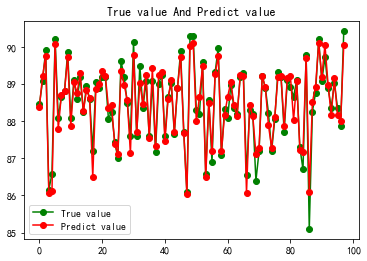

In [6]:
plt.figure()
Ypredict = forest.predict(Xtest)
plt.plot(np.arange(98), Ytest, "go-", label="True value")
plt.plot(np.arange(98), Ypredict, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()

In [7]:
from sklearn import metrics
score = forest.score(Xtest, Ytest)
print('随机森林模型得分： ', score)
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, Ypredict))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, Ypredict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, Ypredict)))

随机森林模型得分：  0.942169376289824
Mean Absolute Error: 0.1832448979591748
Mean Squared Error: 0.06445199408162995
Root Mean Squared Error: 0.2538739728322499
